<a href="https://www.kaggle.com/code/ehetshamshaukat/lung-cancer-analysis-and-model?scriptVersionId=102966879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. **Data analysis**

importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("../input/lung-cancer/survey lung cancer.csv")

In [3]:
dataset.shape

(309, 16)

In [4]:
dataset.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
54,F,57,1,2,1,2,2,2,2,1,2,2,1,1,1,YES
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
160,F,55,1,1,1,2,2,2,2,2,2,1,1,1,2,YES
146,M,51,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
135,M,69,1,1,2,1,1,2,1,2,2,2,2,2,1,YES
36,M,60,1,2,1,1,2,1,1,2,1,2,2,1,2,YES
158,F,56,1,1,2,2,2,2,2,2,2,1,2,2,2,YES
110,M,58,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
29,M,55,1,2,1,1,1,2,1,2,2,2,2,1,1,NO
117,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES


In [5]:
dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
dataset.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [7]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Preprocessing

In [8]:
dataset.columns=dataset.columns.str.title()

In [9]:
dataset.head(10)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [10]:
dataset.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

In [11]:
dataset["Gender"]=dataset["Gender"].replace(["M","F"],["Male","Female"])
col=["Smoking","Yellow_Fingers","Anxiety","Peer_Pressure","Chronic Disease","Fatigue ","Allergy ","Wheezing","Alcohol Consuming","Coughing","Shortness Of Breath","Swallowing Difficulty","Chest Pain"]
for x in col:
        dataset[x]=dataset[x].replace([1,2],[0,1])

In [12]:
dataset.head(10)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,Male,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,Male,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,Female,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,Male,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,Female,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
5,Female,75,0,1,0,0,1,1,1,1,0,1,1,0,0,YES
6,Male,52,1,0,0,0,0,1,0,1,1,1,1,0,1,YES
7,Female,51,1,1,1,1,0,1,1,0,0,0,1,1,0,YES
8,Female,68,1,0,1,0,0,1,0,0,0,0,0,0,0,NO
9,Male,53,1,1,1,1,1,0,1,0,1,0,0,1,1,YES


In [13]:
dataset

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,Male,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,Male,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,Female,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,Male,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,Female,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Female,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,Male,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,Male,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,Male,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


Feature Engineering

In [14]:
dataset.loc[(dataset['Age'] >= 0) & (dataset["Age"] <= 9),"n_age"]="In 0's"
dataset.loc[(dataset['Age'] >= 10) & (dataset["Age"] <= 19),"n_age"]="In 10's"
dataset.loc[(dataset['Age'] >= 20) & (dataset["Age"] <= 29),"n_age"]="In 20's"
dataset.loc[(dataset['Age'] >= 30) & (dataset["Age"] <= 39),"n_age"]="In 30's"
dataset.loc[(dataset['Age'] >= 40) & (dataset["Age"] <= 49),"n_age"]="In 40's"
dataset.loc[(dataset['Age'] >= 50) & (dataset["Age"] <= 59),"n_age"]="In 50's"
dataset.loc[(dataset['Age'] >= 60) & (dataset["Age"] <= 69),"n_age"]="In 60's"
dataset.loc[(dataset['Age'] >= 70) & (dataset["Age"] <= 79),"n_age"]="In 70's"
dataset.loc[(dataset['Age'] >= 80) & (dataset["Age"] <= 89),"n_age"]="In 80's"

Analysis

Gender Vs. Lung Cancer

In [15]:
dataset["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
gender_type_count=dataset["Gender"].value_counts(sort=True)
gender_type_count

Male      162
Female    147
Name: Gender, dtype: int64

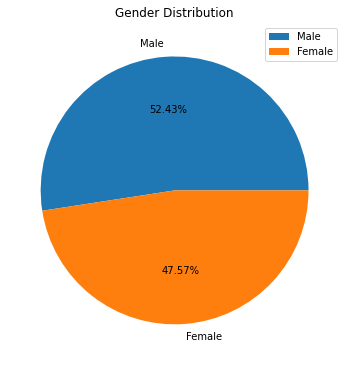

In [17]:
plt.figure(figsize=(6,8))
values=gender_type_count.values
labels=gender_type_count.index
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.title("Gender Distribution")
plt.legend(["Male","Female"])
plt.show()

In [18]:
dataset.groupby(["Gender","Lung_Cancer"]).agg(total_cancer=("Lung_Cancer","count"),minimum_age=("Age","min"),maximum_age=("Age","max")).reset_index()

,Gender,Lung_Cancer,total_cancer,minimum_age,maximum_age
0,Female,NO,22,21,87
1,Female,YES,125,38,81
2,Male,NO,17,46,69
3,Male,YES,145,39,79


Text(0.5, 1.0, 'Gender Vs. Lung Cancer')

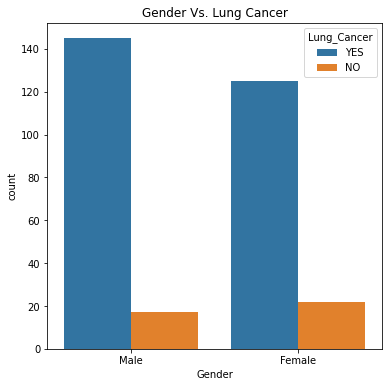

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(data=dataset,x="Gender",hue="Lung_Cancer")
plt.title("Gender Vs. Lung Cancer")

Age

In [20]:
dataset["Age"].min()

21

In [21]:
dataset["Age"].max()

87

In [22]:
dataset

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer,n_age
0,Male,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES,In 60's
1,Male,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES,In 70's
2,Female,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO,In 50's
3,Male,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO,In 60's
4,Female,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO,In 60's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Female,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES,In 50's
305,Male,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES,In 70's
306,Male,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES,In 50's
307,Male,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES,In 60's


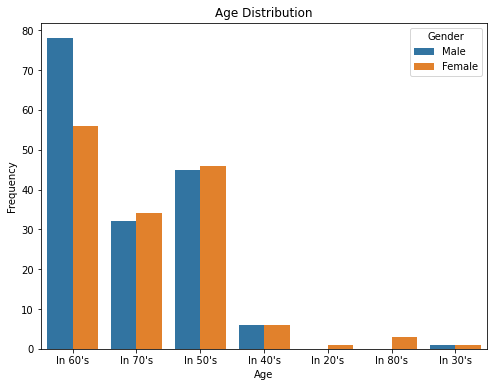

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x="n_age",hue="Gender",data=dataset)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

alcohol consumption

In [24]:
dataset["Alcohol Consuming"].unique()

array([1, 0])

In [25]:
alcohol_con=dataset["Alcohol Consuming"].value_counts(sort=True)
alcohol_con

1    172
0    137
Name: Alcohol Consuming, dtype: int64

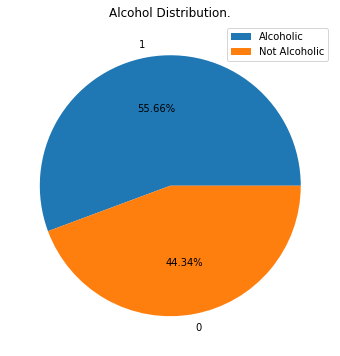

In [26]:
labels=alcohol_con.index
values=alcohol_con.values
plt.figure(figsize=(8,6))
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.title("Alcohol Distribution.")
plt.legend(["Alcoholic","Not Alcoholic"],loc="upper right")
plt.show()

In [27]:
dataset.groupby(["n_age","Lung_Cancer"]).agg(total=("Lung_Cancer","count")).reset_index()

,n_age,Lung_Cancer,total
0,In 20's,NO,1
1,In 30's,YES,2
2,In 40's,NO,2
3,In 40's,YES,10
4,In 50's,NO,13
5,In 50's,YES,78
6,In 60's,NO,20
7,In 60's,YES,114
8,In 70's,NO,2
9,In 70's,YES,64


# Machine learning

importing libraries

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

preprocessing

In [29]:
dataset["Gender"]=dataset["Gender"].replace(["Male","Female"],[1,0])
dataset["Lung_Cancer"]=dataset["Lung_Cancer"].replace(["YES","NO"],[1,0])

data spliting

In [30]:
X=dataset.drop(["Lung_Cancer","n_age"],axis=1)
y=dataset["Lung_Cancer"]

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [32]:
ytest

164    1
125    1
167    1
265    1
147    1
      ..
62     1
301    1
216    1
23     1
32     0
Name: Lung_Cancer, Length: 62, dtype: int64

model training

In [33]:
lr=LogisticRegression(penalty="l2",C=1.0,solver="liblinear")
lr.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [34]:
predicted_value=lr.predict(xtest)
predicted_value

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

comparing

In [35]:
comparation=pd.DataFrame({"Actual Value":ytest,"Predicted Value":predicted_value})
comparation.sample(10)

,Actual Value,Predicted Value
212,1,1
63,1,1
252,1,1
301,1,1
64,1,1
258,1,1
162,1,1
164,1,1
268,1,1
230,1,1


Model evalution

In [36]:
av=comparation["Actual Value"]
pv=comparation["Predicted Value"]
acc=accuracy_score(av,pv)
pre=precision_score(av,pv)
rec=recall_score(av,pv)
print("Accuracy score: ",acc)
print("Precision score: ",pre)
print("Recall score: ",rec)

Accuracy score:  0.8870967741935484
Precision score:  0.9166666666666666
Recall score:  0.9649122807017544


In [37]:
confusion_matrix(av,pv)

array([[ 0,  5],
       [ 2, 55]])